# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

Добавим библиотеки pandas и matplotlib для обработки и визуализации данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Выгрузка данных
data = pd.read_csv('datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None) # Добавим max_columns для анализа всей таблицы
data.index.name = 'id' # Добавим название колонки индексов для удобства
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
id,,,,,,,,,,,,,,,,,,,,,,
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Как можно заметить присутствуют много пропусков в данных, а также стоит изменить типы некоторых столбцов

Построим гистрограмы для определения пропусков данных и аномалий

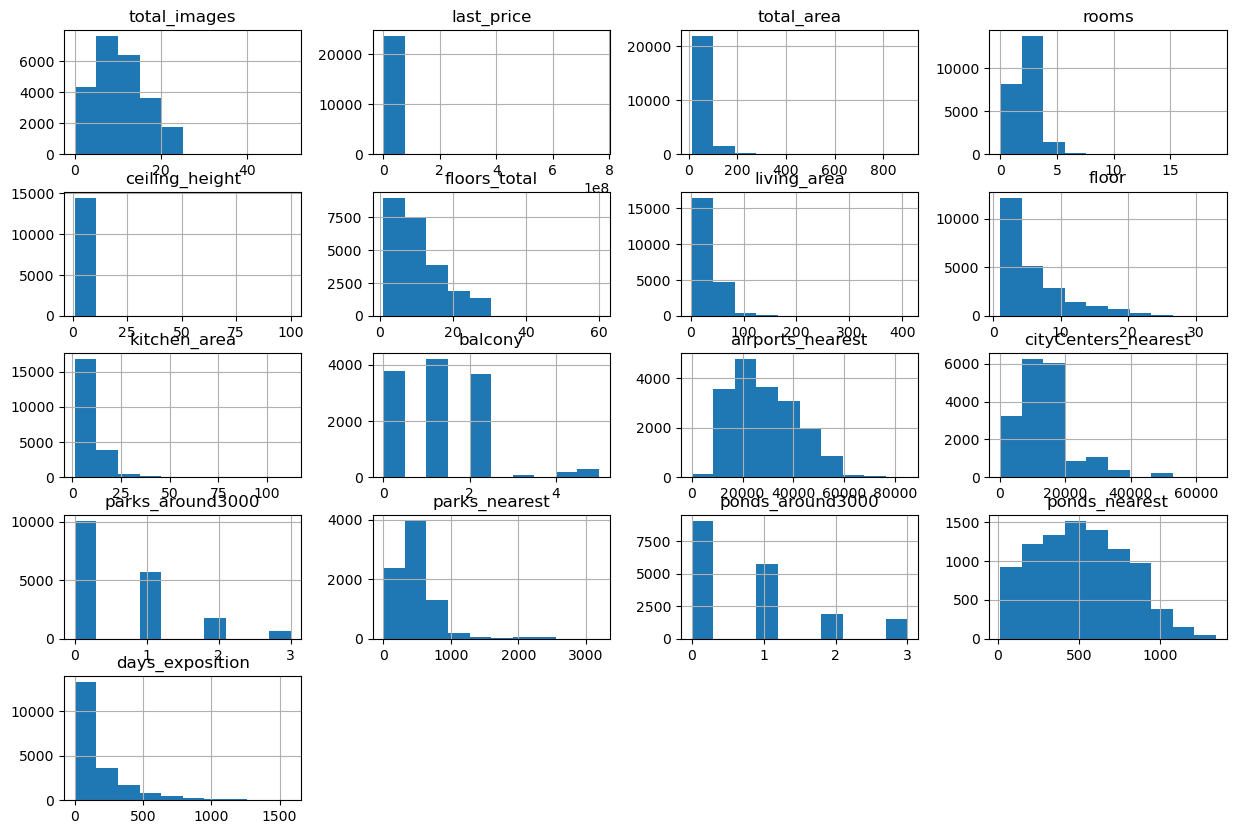

In [4]:
data.hist(figsize=(15, 10));

### Выполните предобработку данных

Вначале переименуем некоторые столбцы для информативности

In [5]:
data = (
    data.rename(columns={
                 'cityCenters_nearest' : 'city_center_nearest',
                 'parks_around3000' : 'parks_around_3km', 
                 'ponds_around3000': 'ponds_around_3km'}
               )
)

Теперь посмотрим сколь пропусков в каждом столбце

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_center_nearest      5519
parks_around_3km         5518
parks_nearest           15620
ponds_around_3km         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Численные столбцы можно заполнить медиаными значениями

In [7]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())

С площадью жилой части и кухни посложнее, для этого вычислим соотношение площади кухни/жилой части к всей, а дальше уже используя это отношение заполним пропуски

In [8]:
living_area_percent = (data['living_area'] / data['total_area']).mean()
kitchen_area_percent = (data['kitchen_area'] / data['total_area']).mean()


data['living_area'] = data['living_area'].fillna(round(data['total_area'] * living_area_percent, 1))
data['kitchen_area'] = data['kitchen_area'].fillna(round(data['total_area'] * kitchen_area_percent, 1))

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Прекрасный способ для замены! 👏🏻👏🏻👏🏻
</div>

Дальше столбец `is_apartment` и `balcony`

In [9]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['balcony'] = data['balcony'].fillna(0)

С `locality_name` ничего нельзя сделать. С `parks_around_3km` и `ponds_around_3km` заполним тоже нулями, потому, что причиной пропусков могло послужить, что парков или прудов по близости нет.

In [10]:
data['parks_around_3km'] = data['parks_around_3km'].fillna(0)
data['ponds_around_3km'] = data['ponds_around_3km'].fillna(0)

In [11]:
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'].sort_values().unique()

array(['бокситогорск', 'волосово', 'волхов', 'всеволожск', 'выборг',
       'высоцк', 'гатчина', 'городской поселок большая ижора',
       'городской поселок янино-1', 'городской посёлок будогощь',
       'городской посёлок виллози', 'городской посёлок лесогорский',
       'городской посёлок мга', 'городской посёлок назия',
       'городской посёлок новоселье', 'городской посёлок павлово',
       'городской посёлок рощино', 'городской посёлок свирьстрой',
       'городской посёлок советский', 'городской посёлок фёдоровское',
       'городской посёлок янино-1', 'деревня агалатово', 'деревня аро',
       'деревня батово', 'деревня бегуницы', 'деревня белогорка',
       'деревня большая вруда', 'деревня большая пустомержа',
       'деревня большие колпаны', 'деревня большое рейзино',
       'деревня большой сабск', 'деревня бор', 'деревня борисова грива',
       'деревня ваганово', 'деревня вартемяги', 'деревня вахнова кара',
       'деревня выскатка', 'деревня гарболово', 'деревня глинка

In [12]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок городского типа', 'городской поселок'], 'поселок', regex=True)
)
data['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары', 'поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок красный бор', 'гатчина', 'деревня федоровское', 'выборг',
       'кронштадт', 'кировск', 'деревня новое девяткино',
       'поселок металлострой', 'поселок лебяжье', 'поселок сиверский',
       'поселок молодцово', 'поселок кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок ефимовский', 'поселок плодовое', 'деревня заклинье',
       'поселок торковичи', 'поселок первомайское', 'красное село',
       'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет', 'сланцы',
       'село путилово', 'ивангород', 'мурино', 'шлиссельбург',
       'никольское', 'зелено

Перейдем к типам данных в стоблцах. Некоторые стоблцы имеют тип float хоть и можно хранить их в int, который занимает меньше памяти. Такие стобцы это:
- `last_price`
- `floors_total`
- `balcony`
- `parks_around_3km`
- `ponds_around_3km`
- `days_exposition`

Преобразуем их в integer

In [13]:
columns_name = ['last_price',
 'floors_total',
 'balcony',
 'parks_around_3km',
 'ponds_around_3km',
 'days_exposition']
for elem in columns_name:
    #data[elem] = data[elem].astype('int')
    pd.to_numeric(data[elem], downcast='integer')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

При заполнении пропусков `is_apartment` уже преобразовалась в `bool`. Тогда остается `first_day_exposition`

In [14]:
# При приобразовании оставим только дату
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S').dt.date
# Еще раз преобразуем для того, чтобы был datetime формат
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

**Подведем итоги проделанной работы:**

- были заполнены пропуски в колонках:
    - `ceiling_height`, медианой, для уменьшения выбросов
    - `floors_total`, медианой, для уменьшения выбросов
    - `living_area`, из соотношения общей площади, поскольку около половины площади будет жилая (если точно 56%)
    - `kitchen_area`, из соотношения общей площади, поскольку некоторая часть будет кухней (около 18%)
    - `is_apartment`, булевым типом, поскольку бинарная колонка либо да либо нет
    - `balcony`, нулями, поскольку скорее всего был пропущен данный столбец, из-за отсутствия балкона
    - `parks_around_3km`, нулями, аналогично, как с балконами
    - `ponds_around_3km`, нулями, аналогично, как с балконами

- Остались еще пропуски в `locality_name`, `airports_nearest`, `city_center_nearest`, `parks_nearest`, `ponds_nearest`, `days_exposition`, но их никак не заполнить
- Были изменены типы данных на integer в колонках, из-за их количественного типа либо для оптимизации памяти
    - `last_price`
    - `floors_total`
    - `balcony`
    - `parks_around_3km`
    - `ponds_around_3km`
    - `days_exposition`
- Был изменен тип на datetime для `first_day_exposition`, для дальнейшего анализа, и оставлена только дата без времени, поскольку никакой полезной информации оно не нёсет
- Была проведена работа с неявными дубликатами поселок записывали либо как посЁлок либо городской поселок либо поселок городского типа, все такие значения были заменены на просто поселок и ё заменено на е, а также для удобства все заглавные буквы были опущены.

**Причины пропусков в данных:**
Скорее всего основная причина в том, что при парсинге данных, часть утерялась или была незаполнена самими владельцами объявлений, что наиболее вероятно, из-за отсутствия у них информации, насчет самого объекта. Это можно понять из колонок `living_area`, `kitchen_area`, `floors_total`, пропуски в других колонках, скорее всего из-за того, что владелец объевления пропускал эти графы при заполнении из-за отсутствия как, например `balcony`, `is_apartment`. И остаются картографические данные, это уже проблема работы сервиса или их потеря при выгрузке, например для категории деревня сервис не смог проложить маршрут до аэропорта или центра Сбп, поэтому оставил пропуск.

### Добавьте в таблицу новые столбцы

- цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой);
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;

Операции с данными приведены ниже

In [15]:
data['sq_m_price'] = round(data['last_price'] / data['total_area'], 2)
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

тип этажа квартиры (значения — «первый», «последний», «другой»);

In [16]:
# Напишем функцию которая собрет и вернет лист с категориями
def categorized_floor(df, col1, col2):
    res = [] # Создание листа
    for row in df.iterrows(): # Цикл по строкам
        if row[1][col1] == row[1][col2]: # Сравнение текущего и последнего этажа
            res.append('последний')
        elif row[1][col1] == 1: # Сравнение текущего и первого этажа
            res.append('первый')
        else:
            res.append('другой')
    return res

data['categorized_floor'] = categorized_floor(data, 'floor', 'floors_total')

Расстояние до центра города в километрах.

In [17]:
data['city_center_nearest_km'] = round(data['city_center_nearest'] / 10**3, 0)

**Подведем итоги проделанной работы**
Были добавлены столбцы:

- цена одного квадратного метра `sq_m_price`
- день недели публикации объявления `weekday`
- месяц публикации объявления `month`
- год публикации объявления `year`
- этажа, на котором расположена квартира `categorized_floor`
- расстояние до центра города в километрах `city_center_nearest_km`

### Проведите исследовательский анализ данных

#### Построение гистограмм и обработка аномалий

<Axes: title={'center': 'ceiling_height'}, ylabel='Frequency'>

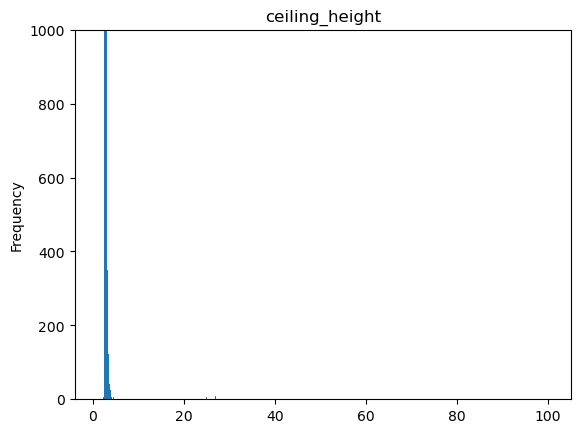

In [18]:
data['ceiling_height'].plot(kind='hist', bins=1000, ylim=(0, 1000), title='ceiling_height')

Если рассмотреть гистограмму, то можно заметить, что больше всего объявлений с высотой потолков около 2.5 метров, как и должно быть. Также как и для жилых помещений, в которых уже выше трех метров, они считаются элитными, отсюда распределение отображает действительность.

Теперь рассмотрим аномалии это будут уже выше 4.5 метров.

In [19]:
data.query('ceiling_height > 4.5').info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 355 to 22938
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            42 non-null     int64         
 1   last_price              42 non-null     float64       
 2   total_area              42 non-null     float64       
 3   first_day_exposition    42 non-null     datetime64[ns]
 4   rooms                   42 non-null     int64         
 5   ceiling_height          42 non-null     float64       
 6   floors_total            42 non-null     float64       
 7   living_area             42 non-null     float64       
 8   floor                   42 non-null     int64         
 9   is_apartment            42 non-null     bool          
 10  studio                  42 non-null     bool          
 11  open_plan               42 non-null     bool          
 12  kitchen_area            42 non-null     float64     

Если рассмотреть `ceiling_height`, то можно заметить значения 25, 27, 32, что скорее всего было получено из-за того, что при записи данных владельцы объявлений не отделили дробную часть. Поэтому выберем эти данные и разделим их на 10 для того, чтобы получить правильные значения.

In [20]:
anom_data = data.query('ceiling_height > 4.5') # Сохраним сроки с аномальными данными
anom_data['ceiling_height'] = anom_data['ceiling_height'].apply(lambda x: x / 10) # Разделим значения на 10

good_ids = data.query('2.5 <= ceiling_height <= 4.5').index # Выберем "хорошие" индексы
good_data = data.query('id in @good_ids') # Сохраним "хорошие" данные 

good_data = pd.concat([good_data,anom_data], ignore_index=True) # Добавим обработанные данные
good_data = good_data.query('2.5 <= ceiling_height <= 4.5') # Сделаем последний срез и сохраним его

C:\Users\gizza\AppData\Local\Temp\ipykernel_6020\3980980922.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anom_data['ceiling_height'] = anom_data['ceiling_height'].apply(lambda x: x / 10) # Разделим значения на 10


<Axes: title={'center': 'total_area'}, ylabel='Frequency'>

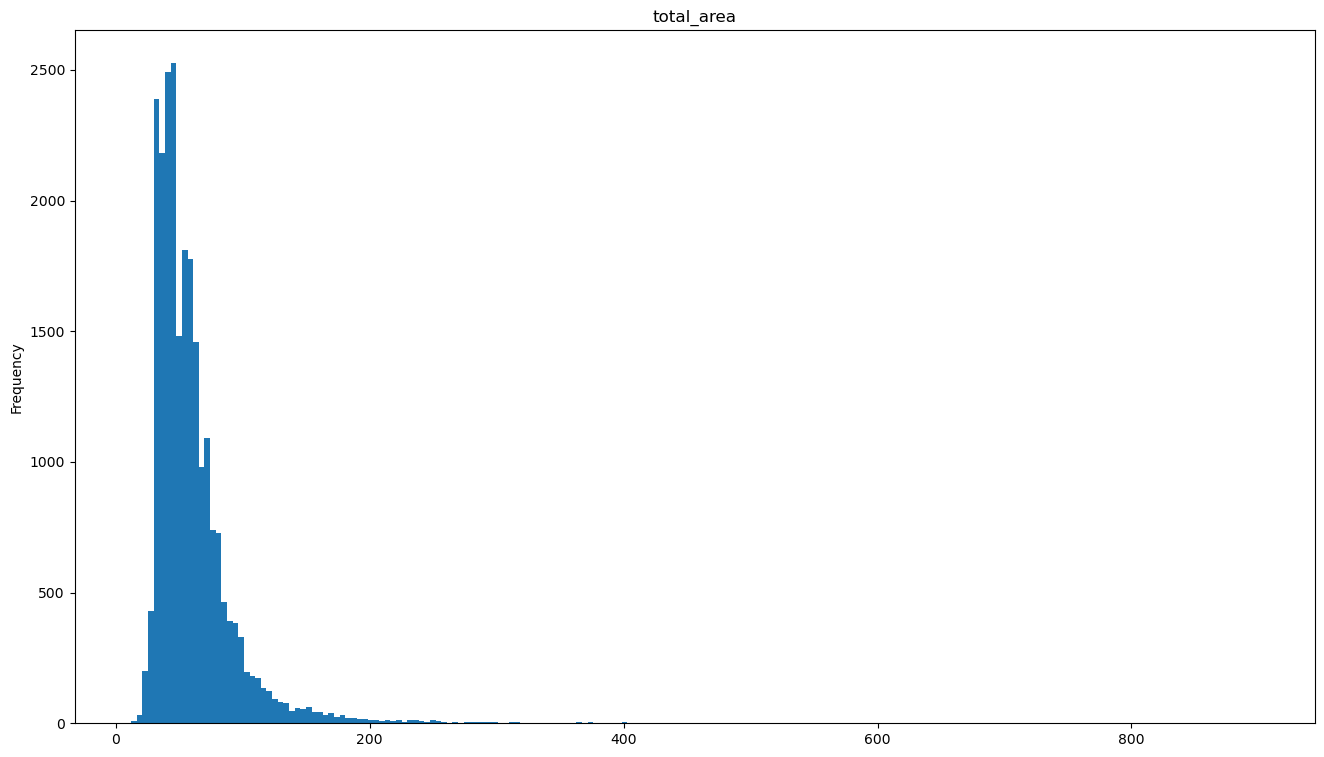

In [21]:
data['total_area'].plot(kind='hist', bins=200, figsize=(16,9), title='total_area')

Если рассмотреть полученные данные, можно рассмотреть пики, которые скорее всего отвечают за популярную квадратуру 1-о, 2-х и 3-х комнатных квартир

Поскольку квадратура может очень сильно разница, то работать с этими данными тяжело, поэтому выберем срез, где площадь больше 14 (по закону), но меньше 400.

In [22]:
good_data = good_data.query('14 <= total_area <= 400')

<Axes: title={'center': 'living_area'}, ylabel='Frequency'>

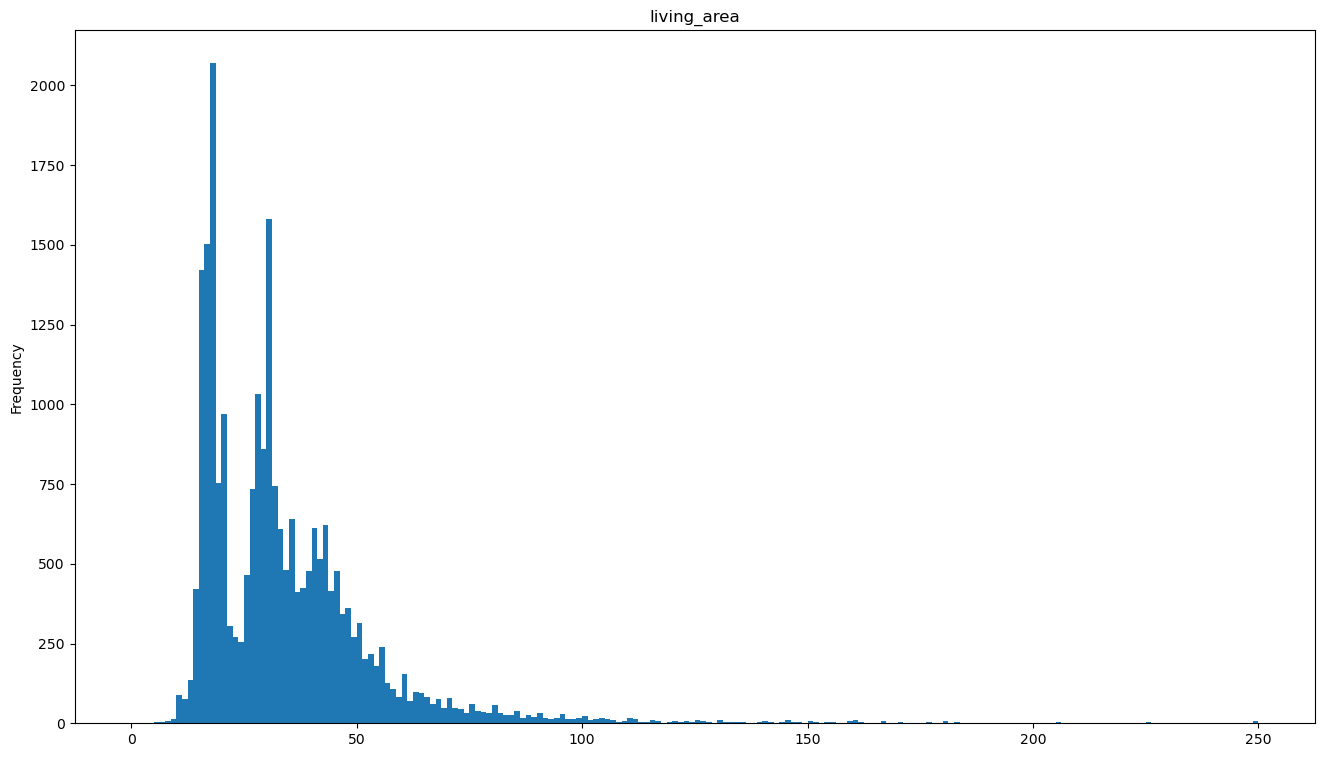

In [23]:
data['living_area'].plot(kind='hist', bins=200, range=(0,250), figsize=(16,9), title='living_area')

Если рассмотреть распределение, то можно заметить яму, которая могла быть вызвана заполнением пропусков в данных.

<Axes: title={'center': 'living_area'}, ylabel='Frequency'>

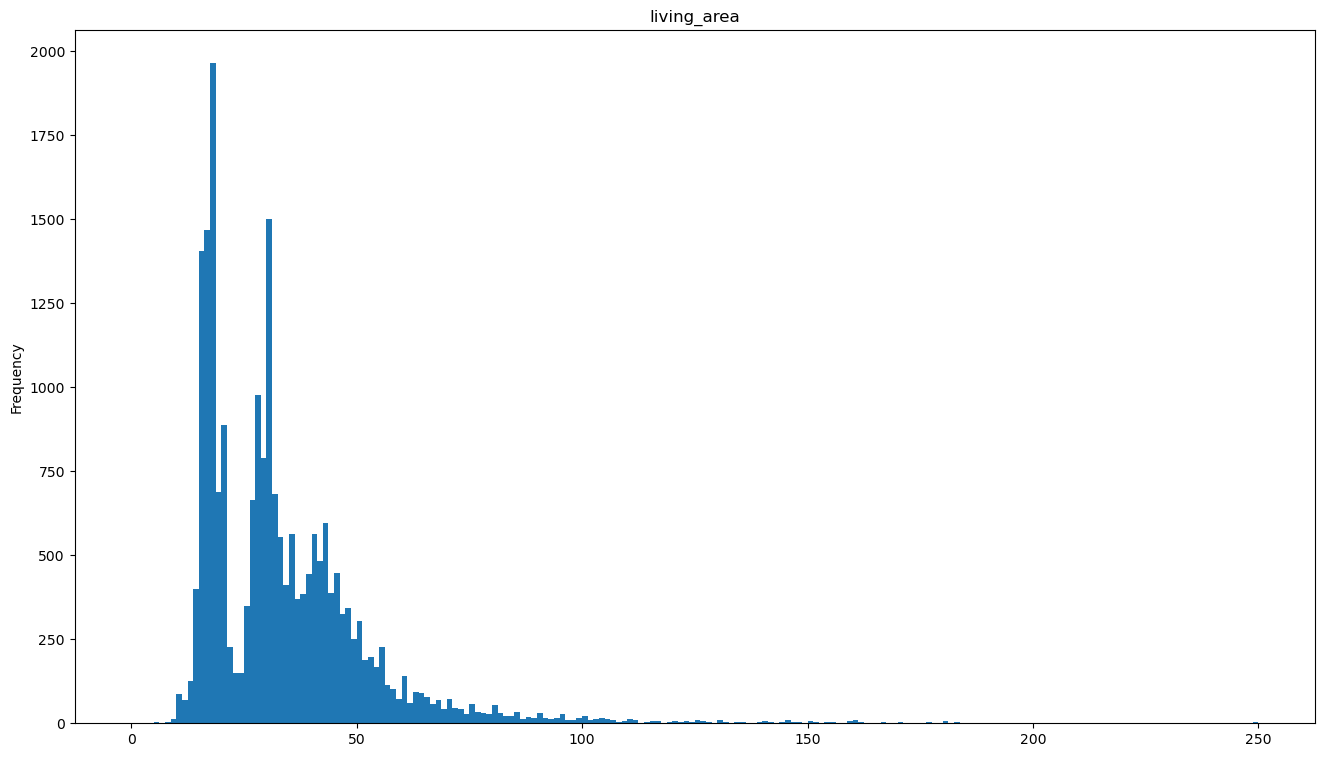

In [24]:
data1 = pd.read_csv('datasets/real_estate_data.csv', sep='\t')
data1['living_area'].plot(kind='hist', bins=200, range=(0,250), figsize=(16,9), title='living_area')

Характер данных не различаются. Если рассмотреть две гистограммы total_area и living_area, то в первой около квадратуры есть тоже яма (где-то на 50 кв.м.), которая соответствует нашему падению, тогда это не аномалия, а нужные данные.

Два пика, относятся к одно и двух комнатных квартирах.

Поскольку мы уже провели срез данных по общей площади до 400 кв.м., то в данном случае выберем данные с квадратурой меньше 200 кв.м. но больше 6 (по закону).

In [25]:
good_data = good_data.query('6 <= living_area <= 200')

<Axes: title={'center': 'kitchen_area'}, ylabel='Frequency'>

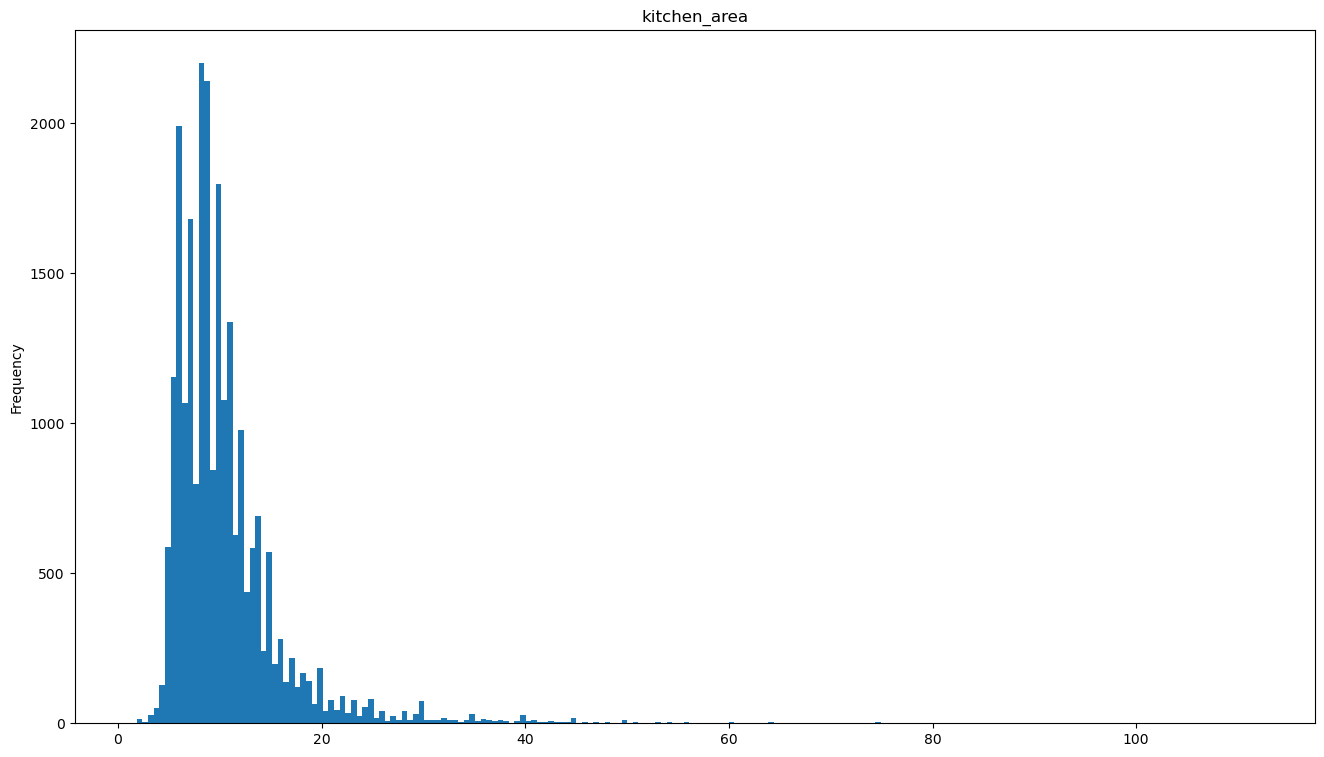

In [26]:
data['kitchen_area'].plot(kind='hist', bins=200, figsize=(16,9), title='kitchen_area')

На данном распределении присутствуют много падений, но по пикам можно определить популярные площади.

Нет определенного регламента квадратуры кухни, поэтому в данном случаем не будем выбирать, какие-то определенные данные, а сохраним их все

<Axes: title={'center': 'last_price'}, ylabel='Frequency'>

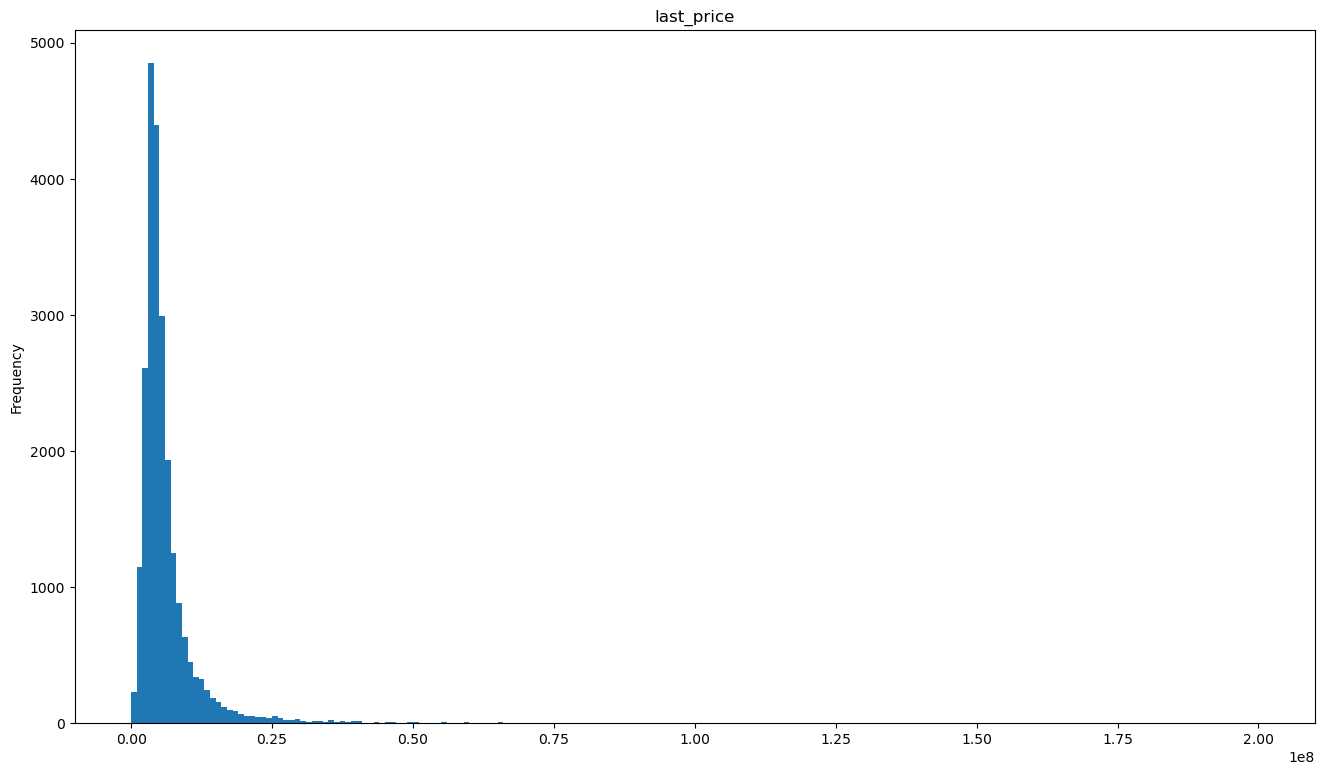

In [27]:
data['last_price'].plot(kind='hist', bins=200, range=(0, 2e8), figsize=(16,9), title='last_price')

На данной гистограмме, распределение Пуассона, как и должно быть, но из-за масштаба графика могу присутствовать нулевые значения.

In [28]:
data['last_price'].min()

12190.0

Минимальная цена 12190, поскольку нам не дана информация в каких денежных единицах (рубли, доллары, у.е.) предоставлены данные, то в данном случае найти аномалии нам не удастся.

<Axes: title={'center': 'rooms'}, ylabel='Frequency'>

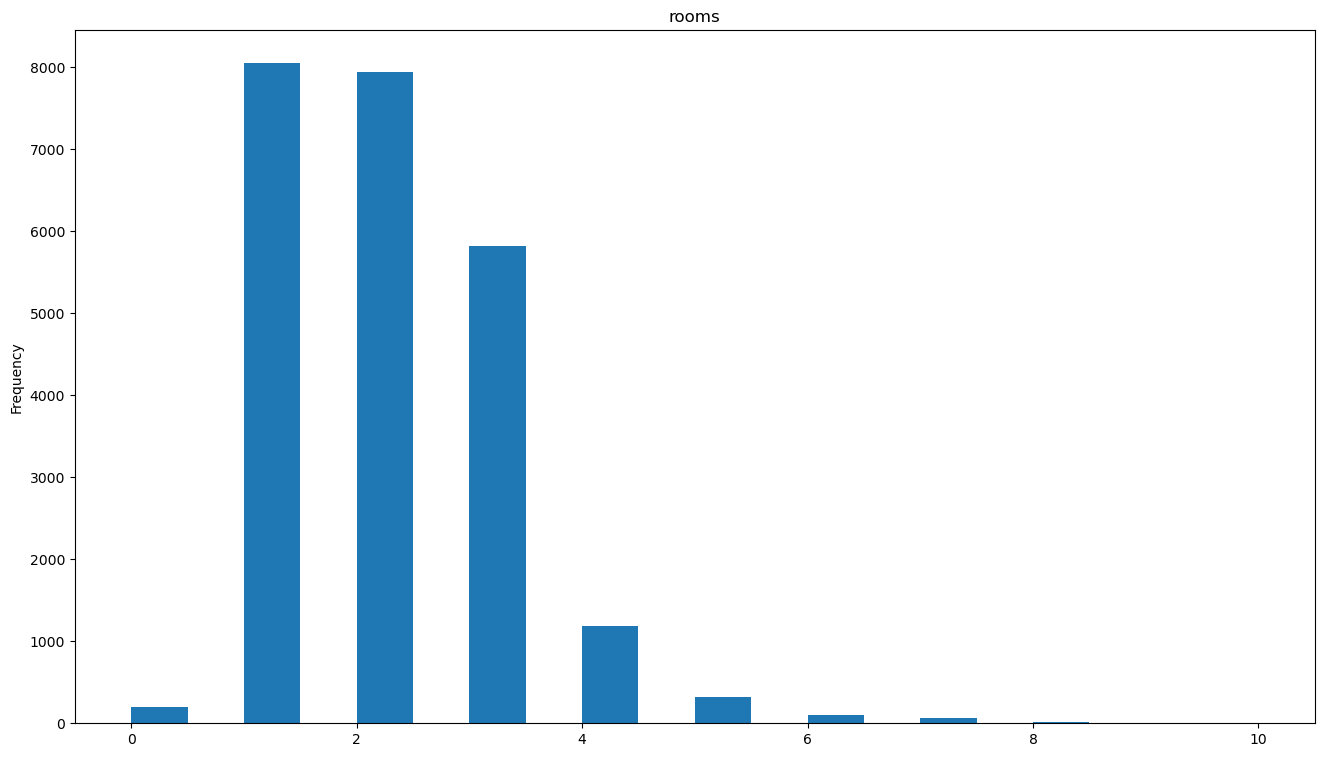

In [29]:
data['rooms'].plot(kind='hist', bins=20, range=(0, 10), figsize=(16,9), title='rooms')

Самые частые объявления на 1, 2 и 3 квартиры, потом идет резкое падение на 4.

Для среза возьмем количества комнат от 1.

In [30]:
good_data = good_data.query('rooms >= 1')

<Axes: >

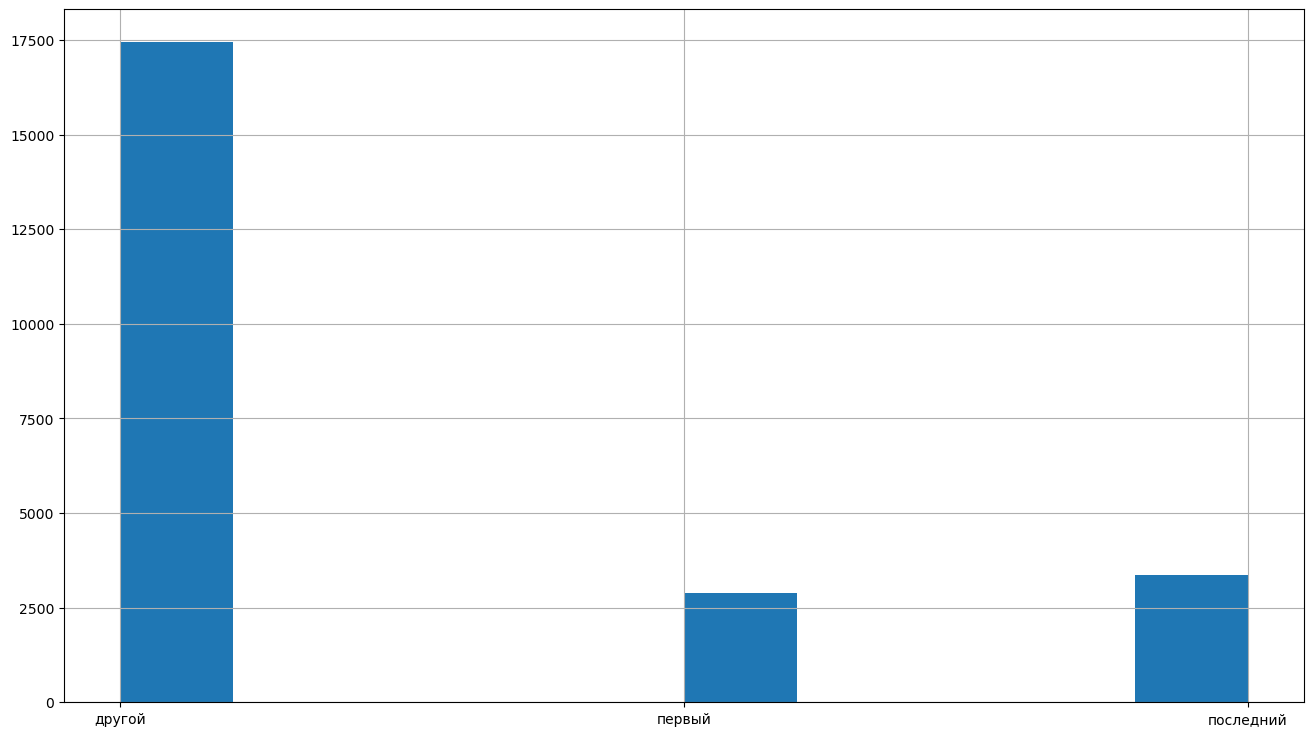

In [31]:
data['categorized_floor'].hist(figsize=(16, 9))

Как можно заметить, объявлений на первый этаж меньше, чем на последний, а больше всего объявлений на другие этажи 

<Axes: title={'center': 'floors_total'}, ylabel='Frequency'>

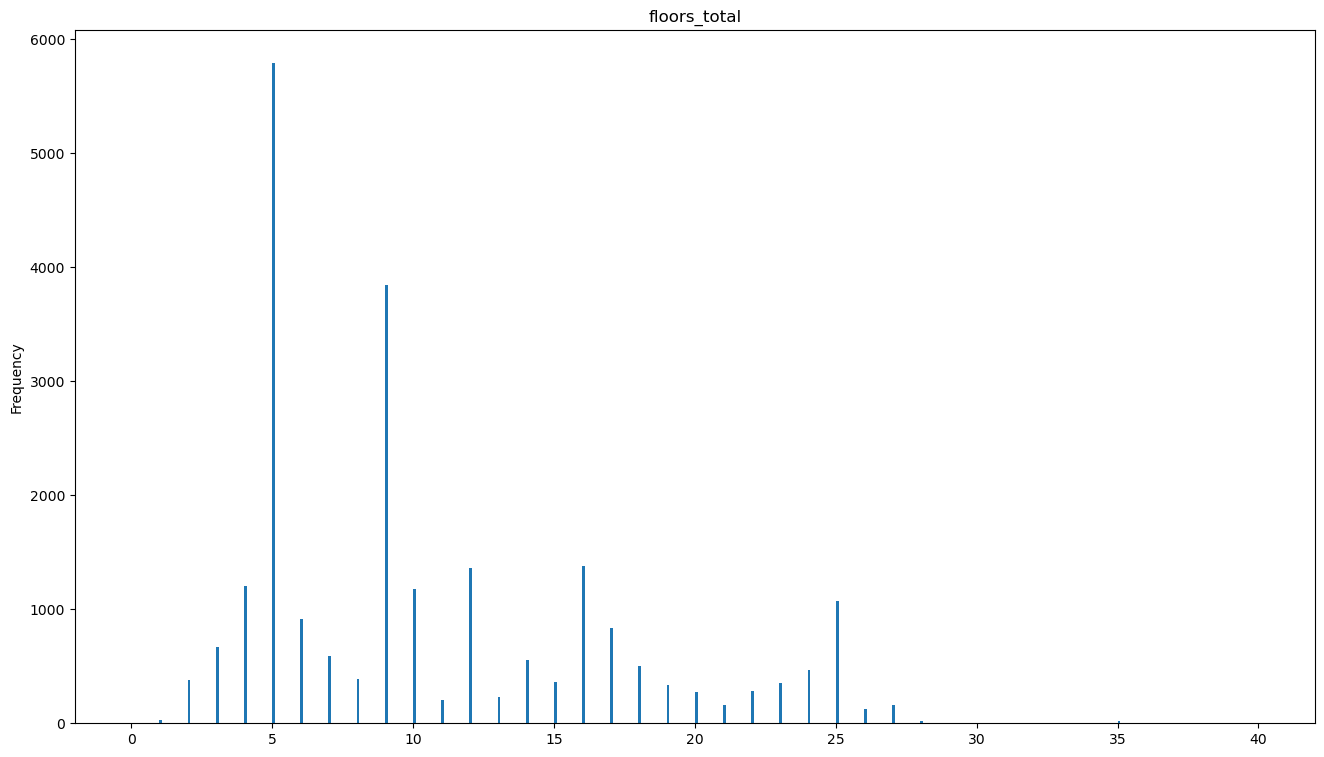

In [32]:
data['floors_total'].plot(kind='hist', bins=400, range=(0, 40), figsize=(16, 9), title='floors_total')

Как можно заметить, что больше всего объявления для 5 и 9 этажек, которые неотносятся к новостройкам. По этой диаграмме, можно определить, наиболее популярную этажность 5, 9, 12, 16 и 25 этажей.

Для этажности домов тоже нет регламента, но из открытых источников, было получено, что самый высокий жилой дом в Спб это "Петергофская Венеция" 37 этажей, будем отталкиваться от этого.

In [33]:
good_data = good_data.query('floors_total <= 37')

<Axes: title={'center': 'city_center_nearest'}, ylabel='Frequency'>

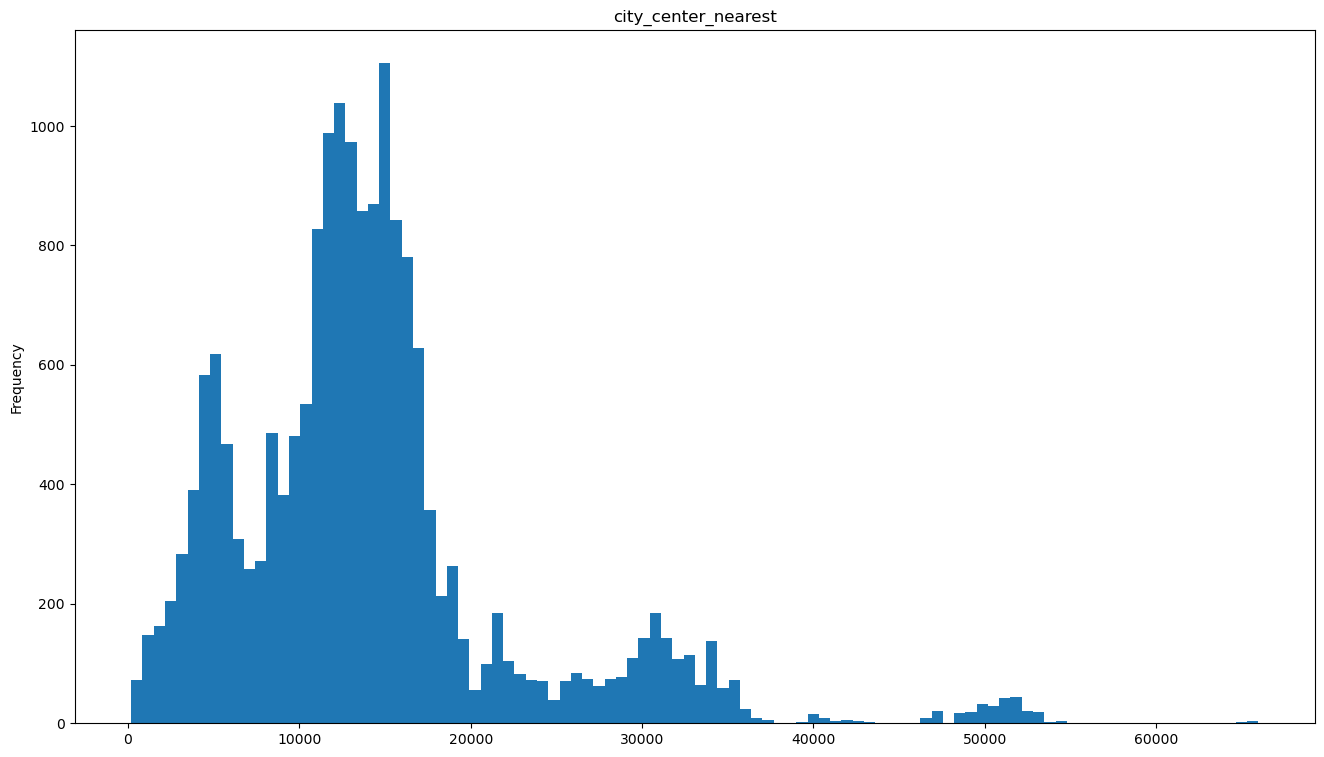

In [34]:
data['city_center_nearest'].plot(kind='hist', bins=100, figsize=(16, 9), title='city_center_nearest')

Распределение похоже на Пуассона с небольшими различиями в пиках на 5 км. а остальные пики после 20 км. уже относятся к деревням и селам (за чертой города). Значения около нуля могли быть вызваны ошибками в картографических данных

<Axes: title={'center': 'parks_nearest'}, ylabel='Frequency'>

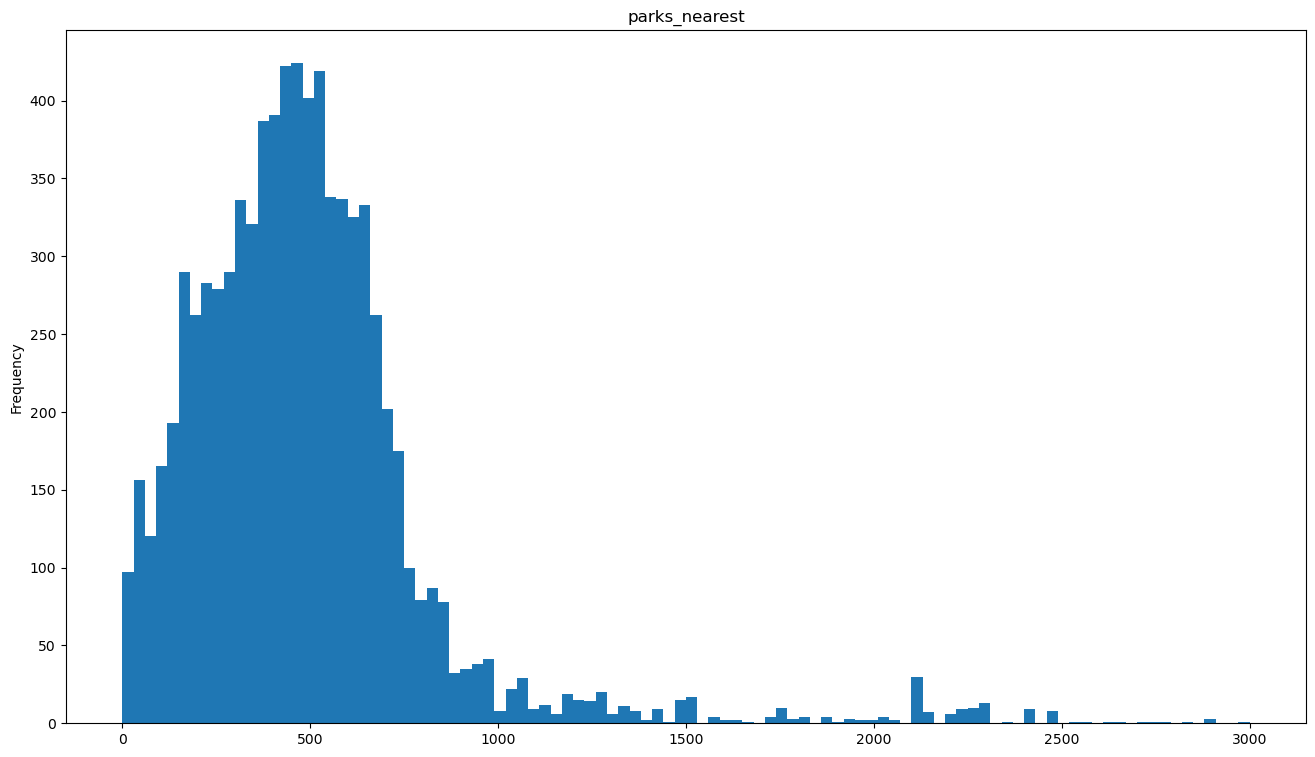

In [35]:
data['parks_nearest'].plot(kind='hist', bins=100, range=(0, 3000), figsize=(16, 9), title='parks_nearest')

Здесь тоже распределение Пуассона с небольшими отклонениями для большинства объявлений парк находится совсем рядом (500 м.), проверить этот пик не получиться, поскольку нет точных адресов.

Нулевые значения это ошибка картографа для двух гистограмм выше.

**Подведем итоги проделанной работы**

Были построенны гистограммы выбранных столбцов и проанализированны:
- общая площадь `total_area`
- жилая площадь `living_area`
- площадь кухни `kitchen_area`
- цена объекта `last_price`
- количество комнат `rooms`
- высота потолков `ceiling_height`
- тип этажа квартиры `categorized_floor`
- общее количество этажей в доме `total_floors`
- расстояние до центра города в метрах `city_center_nearest`
- расстояние до ближайшего парка `parks_nearest`

По возможности были отработанны аномалии выбранные данные были записаны в good_data

#### Изучение скорости продажи квартир

<Axes: title={'center': 'days_exposition'}, ylabel='Frequency'>

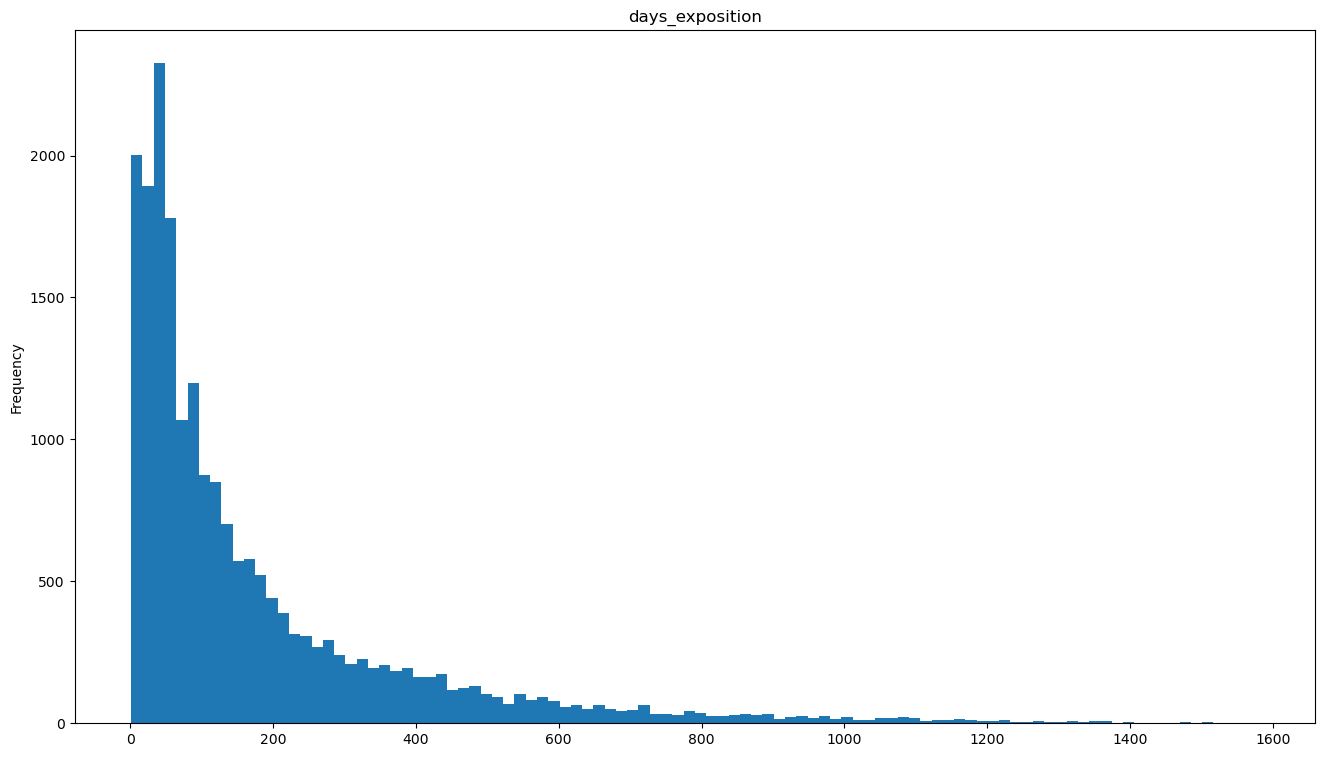

In [36]:
data['days_exposition'].plot(kind='hist', bins=100, figsize=(16, 9), title='days_exposition')

В основном объявление снимают после 50 дней, около нулевые значения скорее всего связаны с тем, что владелец передумал продавать объект.

In [37]:
data['days_exposition'].describe().astype('int')

count    20518
mean       180
std        219
min          1
25%         45
50%         95
75%        232
max       1580
Name: days_exposition, dtype: int32

Среднее значение: 180 дней

Медианное значение: 95 дней

Если рассматривать по квартилям, то необычайно быстрые продажи это меньше 45 дней, а долгие это больше 232

#### Факторы влияющие на стоимость квартиры

In [38]:
'''
Напишем функцию, которая будет создавать сводные таблицы, строить график рассеяния цены 
и считает коэф. корреляции двух выбранных величин
'''
def scatter_corr_price(column_name):
    good_data\
    .pivot_table(index=good_data.index, values=[column_name, 'last_price'])\
    .plot(x=column_name, y='last_price', kind='scatter', alpha=0.03)
    print(good_data[column_name].corr(good_data['last_price']))

0.681417632219771


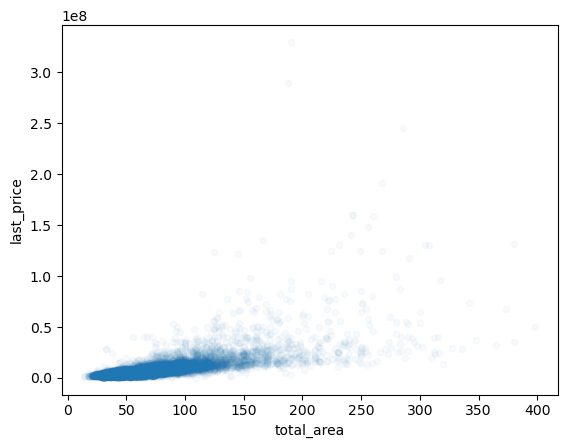

In [39]:
scatter_corr_price('total_area')

Коэф. корреляции 0.68, из чего можно понять что общая квадрату очень сильно влияет на стоимость

0.5995736248531652


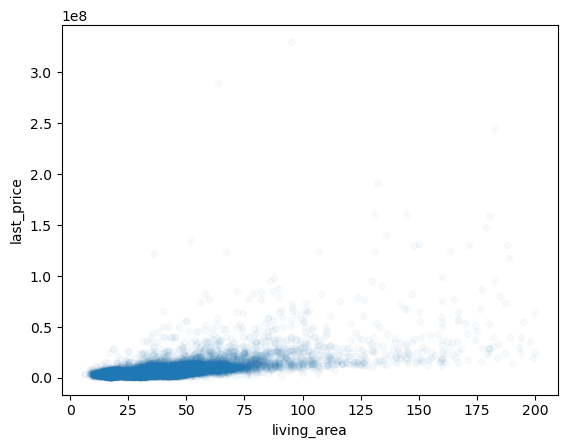

In [40]:
scatter_corr_price('living_area')

0.5455145462512115


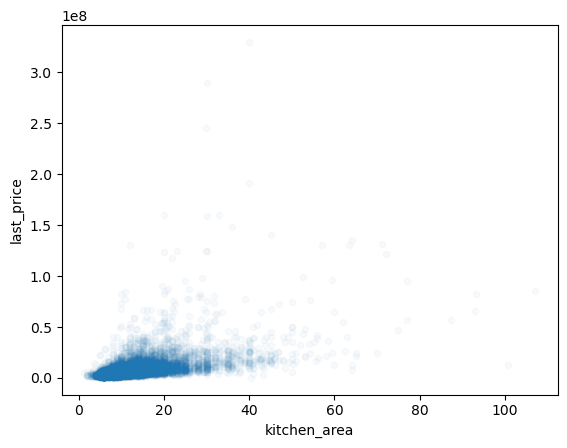

In [41]:
scatter_corr_price('kitchen_area')

Аналогично для жилой и куханной площади, они также сильно влияют на ценообразование

0.39807608868962946


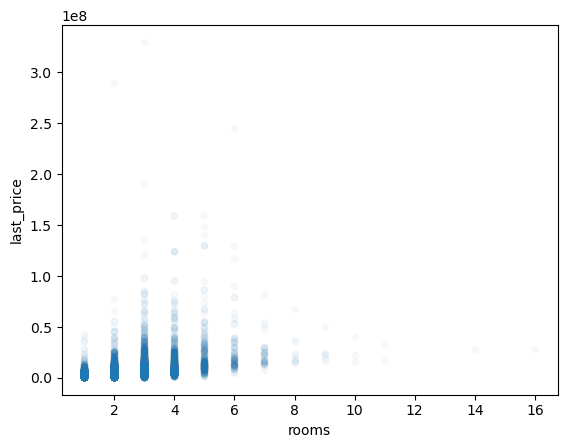

In [42]:
scatter_corr_price('rooms')

Количество комнат тоже влияет на стоимость, но меньше чем квадратура

In [43]:
# Для визуализации сгрупируем данные и рассчитаем медиану
good_data_first_f = good_data.query('categorized_floor == "первый"')\
                             .pivot_table(index='floor', values='last_price', aggfunc='median')
good_data_other_f = good_data.query('categorized_floor == "другой"')\
                             .pivot_table(index='floor', values='last_price', aggfunc='median')
good_data_last_f = good_data.query('categorized_floor == "последний"')\
                            .pivot_table(index='floor', values='last_price', aggfunc='median')

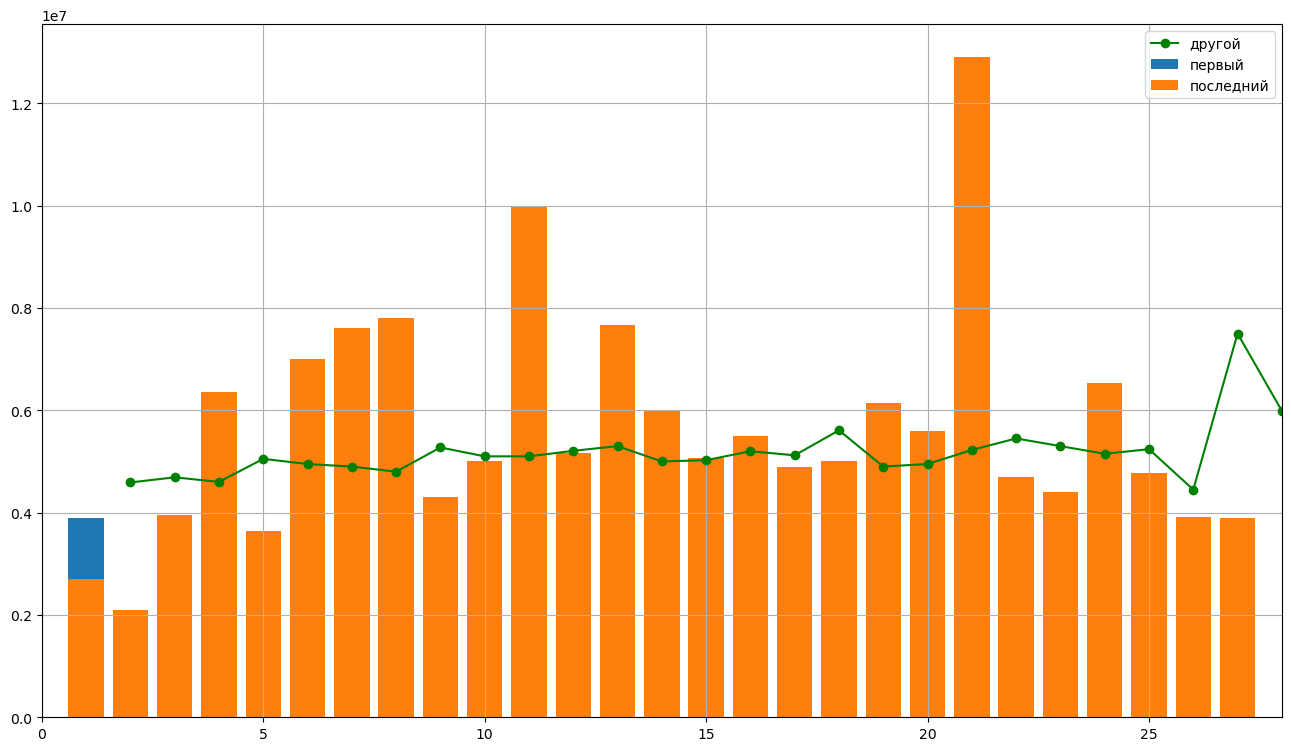

In [44]:
plt.figure(figsize=(16, 9))

plt.bar(good_data_first_f.index, good_data_first_f['last_price'], label='первый')
plt.plot(good_data_other_f.index, good_data_other_f['last_price'], color='green', marker='o', label='другой')
plt.bar(good_data_last_f.index, good_data_last_f['last_price'], label='последний')

plt.xlim(0, 28)
plt.grid()
plt.legend()
plt.show()

Как можно заметить, цена первого этажа ниже чем у остальных, цена для последних этажей разница, это может быть связанно с заполнением пропусков в данных, но общая тенденция видна, что цены на последний этаж выше.

In [45]:
# Введем функцию которая будет считать медианы цены и строить график
def median_plot(col1):
    pivot_data = good_data.pivot_table(index=col1, values='last_price', aggfunc='median')
    plt.plot(pivot_data.index.values, pivot_data['last_price'], marker='o')
    plt.title(col1)
    plt.show()

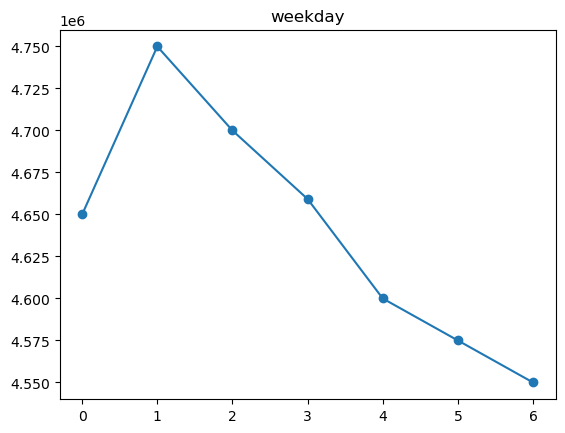

In [46]:
median_plot('weekday')

Цена также зависит от дня недели публикации, самые дорогие квартиры публикуютя во вторник

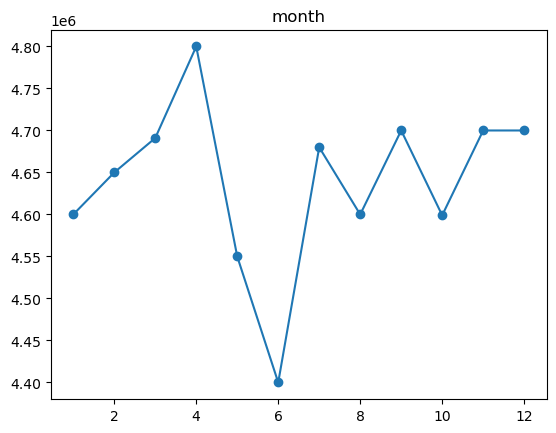

In [47]:
median_plot('month')

С месяцем зависимость сильно изменяется, самые дорогие публикуют в апрель, самые дешевые в июнь

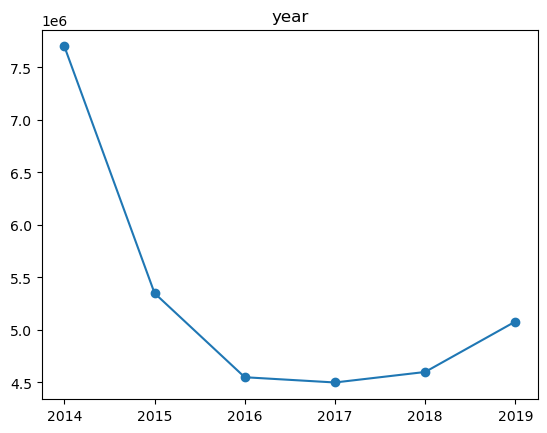

In [48]:
median_plot('year')

Как можно заметить цена на квартиры после 2014 года очень сильно упала, но после 2017 года идет рост цены.

**Подведем итоги проделанной работы**

Найдены медианное значения и ср.значение длительности продажи квартиры в днях

Были построены графики зависимости для цены квартиры от различных параметров и изученны их влияния на цену:

- общей площади `total_area`
- жилой площади `living_area`
- площади кухни `kitchen_area`
- количества комнат `rooms`
- этажа, на котором расположена квартира (первый, последний, другой) `categorized_floor`, `floors`
- даты размещения (день недели, месяц, год).`weekday`, `month`, `year`

Было установленно, что квадратура и количество комнат сильно влияет на цену, также если квартира на первом этаже это существенно сбивает цену, напротив цена для последнего этажа значительно выше, чем для остальных.

Дата размещения от дня недели и месяца влияют на цену:
- Самые дорогие публикуются во вторник, апрель и 2014 год
- Самые дешевые в воскресенье, июнь и 2016 год

Также после 2017 года цена на квартира начала расти

#### Расчет цены одного кв. м. для 10 населенных пунктов с наибольшим количеством объявлений

In [49]:
# Выберем названия населенных пунктов с наиболишьм кол-вом объявлений
loc_names = good_data\
    .groupby('locality_name')['last_price']\
    .count()\
    .sort_values(ascending=False)\
    .head(10).index
s = 0 # сумма
# Цикл который перебирает названия
for i in loc_names:
    # Суммируем ср. значения цены за кв.м. каждого населенного пункта и суммируем
    s += good_data.query('locality_name == @i')['sq_m_price'].mean()
# Делим на количество населенных пунктов   
s / 10

83446.3640958018

In [50]:
'''
Для нахождения макс и мин цены за кв.м. используем сводную таблицу по названию локации и рассчитаем ср. по цене за кв.м
И отсортируем по цене
'''
good_data\
    .query('locality_name in @loc_names')\
    .pivot_table(index='locality_name', values='sq_m_price', aggfunc=['count','mean'])\
    .sort_values(( 'mean', 'sq_m_price'), ascending=False)

,count,mean
,sq_m_price,sq_m_price
locality_name,,
санкт-петербург,15509,114201.840091
пушкин,365,103122.752575
деревня кудрово,283,92297.218834
поселок парголово,322,90320.008509
поселок мурино,529,85004.057807
поселок шушары,436,78405.738532
колпино,337,75443.972849
гатчина,307,68746.146515


Самая высока цена за кв.м. в СПб, самая низкая в деревене Выборге

#### Цена от расстояния до центра Питера

In [51]:
# Сделаем срез по СПб
good_data_spb = good_data.query('locality_name == "санкт-петербург"')
# Создадим сводную таблицу по расстоянию посчитаем среднее и количество
good_data_spb_pivot = good_data_spb\
    .pivot_table(index='city_center_nearest_km', values='last_price', aggfunc=['count', 'mean'])
# Переименнуем столбцы
good_data_spb_pivot.columns = ['count', 'mean']
good_data_spb_pivot.head(5)

,count,mean
city_center_nearest_km,,
0.0,27,3.144912e+07
1.0,186,2.052070e+07
2.0,304,1.637444e+07
3.0,347,1.077292e+07
4.0,678,1.178500e+07


-0.7414791088895197


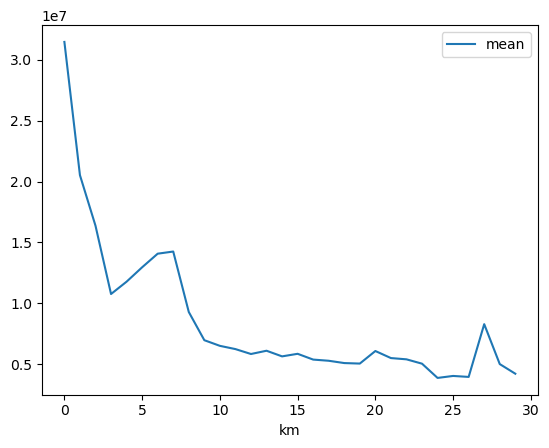

In [52]:
# Сохраним значения индекса с км, поскольку не получается обратиться к индексу
good_data_spb_pivot['km'] = good_data_spb_pivot.index.values
# Построим график
good_data_spb_pivot.plot(x='km', y='mean')
# Вычислим коэф. корреляции
print(good_data_spb_pivot['km'].corr(good_data_spb_pivot['mean']))

Цена очень сильно зависит от расстояни до центра вблизи центра почти на порядок цена выше, около 5 км идет плавный рост, наверное связанный с отдельными хорошими районами СПб, дальше идет падение цены, на 27 км. идет рост, который может быть связан с выбросом, либо элитным районом СПб

**Подведем итоги проделанной работы**

- Была найдена ср. цена за кв.м. для 10 населенных пунктов с самым большим кол-вом объявлений: 83446

- Рассчитана ср. цена за кв.м. для тех же населенных пунктов, в Питере наибольшая в Выборге наименьшая.

- Была найдена зависимость цены квартир в СПб от расстояния до центра, цена очень сильно зависит от расстояни до центра вблизи центра почти на порядок цена выше, около 5 км идет плавный рост, наверное связанный с отдельными хорошими районами СПб, дальше идет падение цены

### Напишите общий вывод

**Общие выводы**

- Был проведен анализ объявлений по продаже квартир в СПб в период с 2014 по 2019 год
- Были обработаны пропуски, где возможно, изменены названия колонок, изменен тип данных (где требовалось)
- Были добавлены новые колонки для дальнейшего анализа
- Проанализированны гистограммы выбранных параметров, для обработки аномалий в данных
- По гистограмме `days_exposition` была установлена примерное время продажи квартиры в 95 дней
- Найдены факторы, которые влияют на ценообразование, для этого были построенны графики и вычисленны коэф. корреляций:
    1. общая площадь
    2. жилая площадь
    3. площадь кухни
    4. количество комнат
- Для других факторов, как этаж и дата размещения были вычисленны медианы и по ним построены зависимости
    1. Этаж существенно влияет на цену, самая низкая это первый, самая высокая это последний
    2. День недели публикации, самые дорогие во вторник, самые дешевые в воскресенье
    3. Цена на квартиры постоянно изменяется в течении года, то дешевеет, то дорожает. Самые дорогие объявления публикуются в апрель, самые дешевые в июнь
    4. С годами цена на квартиры существенно упала по сравнению с 2014 годом, но после 2017 цена начала расти, соответсвенно самая низкая в 2016, самая высокая в 2014 года
- Была найдем ср.цена за кв.м. в 10 населенных пунктах с наибольшими количествами объявлений: 83446
- Самая высока цена за кв.м. в СПб, самая низкая в деревене Выборге
- Была изучена зависимость цены в СПб от расстояния до центра, цена очень сильно зависит от расстояния, вблизи центра почти на порядок цена выше, около 5 км идет плавный рост, наверное связанный с отдельными хорошими районами СПб, дальше идет падение цены

Таким образом можно выделить основные факторы влияющие на цену это квадратура квартиры, количество комнат расстояние до центра СПб. С годами цена на квартиры упала по сравнению с 2014 годом, но после 2017 цена начала расти.